<a href="https://colab.research.google.com/github/Henrique-Vicentini/case_classific_churn/blob/main/case_completo_classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt


#Entendimento do negocio
-saber se o cliente dará churn ou nao
- variáveis numéricas e categóricas
- observar os tipos dos dados que temos

In [ ]:
df = pd.read_excel('/content/churn_data.xlsx')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#observar o tamanho do dataset
df.shape

(7032, 21)

In [ ]:
#ver as variações das variaveis numericas do dataset
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
#ver se há valores faltantes e os tipos de variaveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int64  


In [ ]:
df.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

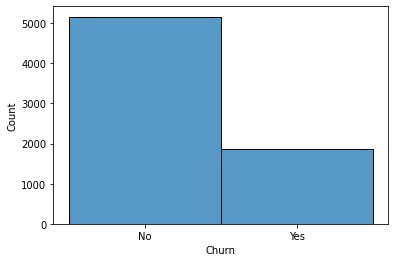

In [ ]:
sns.histplot(data = df, x = 'Churn')

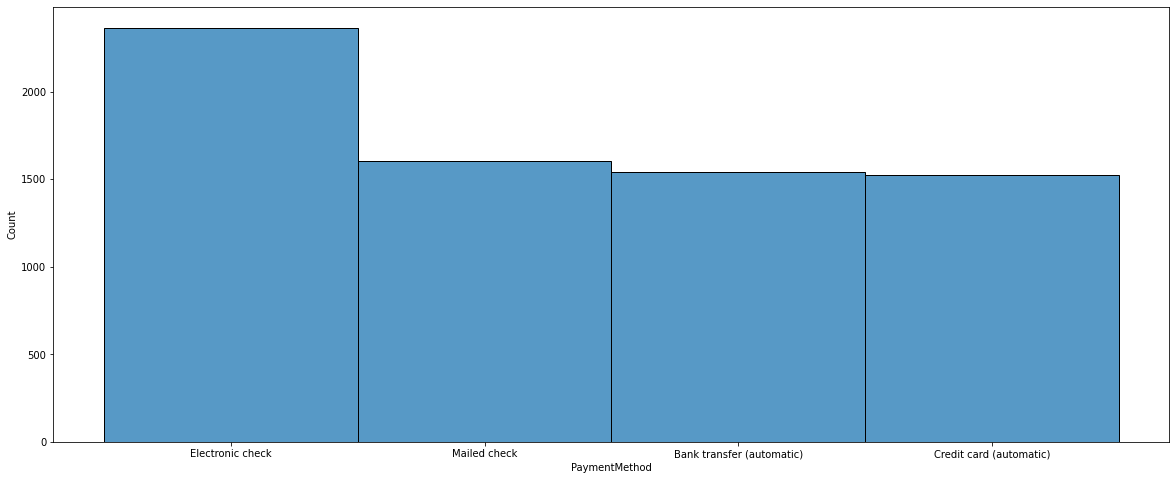

In [ ]:
plt.figure(figsize = (20,8))
sns.histplot(data = df, x = 'PaymentMethod')

#Tratamento de Dados

In [ ]:
#dropar id
df.drop(columns = ['customerID'], inplace = True)

In [ ]:
#transformar as variaveis categoricas
le = LabelEncoder()

#gender
le.fit(df.gender)

df.gender = le.transform(df.gender)

#SeniorCitizen

le.fit(df.SeniorCitizen)

df.SeniorCitizen = le.transform(df.SeniorCitizen)

#Partner
le.fit(df.Partner)

df.Partner = le.transform(df.Partner)

#Dependents
le.fit(df.Dependents)

df.Dependents = le.transform(df.Dependents)

#PhoneService
le.fit(df.PhoneService)

df.PhoneService = le.transform(df.PhoneService)

#MultipleLines
le.fit(df.MultipleLines)

df.MultipleLines = le.transform(df.MultipleLines)

#InternetService
le.fit(df.InternetService)

df.InternetService = le.transform(df.InternetService)

#OnlineSecurity
le.fit(df.OnlineSecurity)
df.OnlineSecurity = le.transform(df.OnlineSecurity)

#OnlineBackup

le.fit(df.OnlineBackup)
df.OnlineBackup = le.transform(df.OnlineBackup)

#DeviceProtection
le.fit(df.DeviceProtection)

df.DeviceProtection = le.transform(df.DeviceProtection)

#TechSupport
le.fit(df.TechSupport)

df.TechSupport = le.transform(df.TechSupport)

#StreamingTV
le.fit(df.StreamingTV)

df.StreamingTV = le.transform(df.StreamingTV)

#StreamingMovies
le.fit(df.StreamingMovies)

df.StreamingMovies = le.transform(df.StreamingMovies)

#Contract
le.fit(df.Contract)

df.Contract = le.transform(df.Contract)

#PaperlessBilling
le.fit(df.PaperlessBilling)

df.PaperlessBilling = le.transform(df.PaperlessBilling)

#PaymentMethod
le.fit(df.PaymentMethod)

df.PaymentMethod = le.transform(df.PaymentMethod)

#Churn
le.fit(df.Churn)

df.Churn = le.transform(df.Churn)

In [ ]:
#separar variáveis

x = df.drop(columns = ['Churn'])
y = df['Churn']

In [ ]:
#separar massa para treino e test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state= 123)

In [ ]:
#normalizar a base inteira

sc = StandardScaler()

sc.fit(df)

x_train = pd.DataFrame(sc.fit_transform(x_train), index = x_train.index, columns = x_train.columns)

In [ ]:
x_test = pd.DataFrame(sc.transform(x_test), index = x_test.index, columns = x_test.columns)

In [ ]:
x_test.shape

(1407, 19)

# Modeling

In [ ]:
#fazer o modelo
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
lr = model.fit(x_train, y_train)

#predizer o modelo
predict = model.predict(x_test)

#criar uma coluna para ver se o modelo esta bom e comprar
#x_test['predicao'] = predict
#x_test['real'] = y_test

#x_test

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


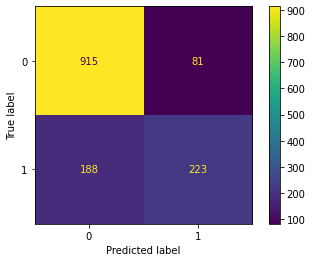

In [ ]:
#observar atraves da métricas
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model.fit(x_train,y_train), x_test, y_test, values_format='d');

In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia (Treino): {accuracy_score(y_train, lr.predict(x_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, lr.predict(x_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, lr.predict(x_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, lr.predict(x_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, lr.predict(x_train))}")
print(f"Precision (Teste): {precision_score(y_test, lr.predict(x_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, lr.predict(x_train))}")
print(f"Recall (Teste): {recall_score(y_test, lr.predict(x_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, lr.predict(x_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, lr.predict(x_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, lr.predict_proba(x_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, lr.predict_proba(x_test)[:,1])}")

Acurácia (Treino): 0.8039111111111111
Acurácia (Teste): 0.8088130774697939
Acurácia Balanceada (Treino): 0.7151561208436659
Acurácia Balanceada (Teste): 0.7306268871104857
Precision (Treino): 0.6487845766974015
Precision (Teste): 0.7335526315789473
Recall (Treino): 0.5308641975308642
Recall (Teste): 0.5425790754257908
F1-Score (Treino): 0.5839305922293474
F1-Score (Teste): 0.6237762237762238
ROCAUC (Treino): 0.8427221295547385
ROCAUC (Teste): 0.8601571737069934


#Utilizando outro modelo

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_r  = RandomForestClassifier()

rf = model_r.fit(x_train, y_train)

predict_random = model_r.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


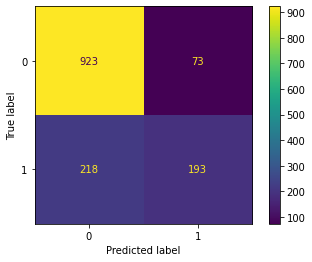

In [ ]:
#observar atraves da métricas
plot_confusion_matrix(rf, x_test, y_test, values_format='d');

In [ ]:
#ver as métricas
#indicio de oferfitting

print(f"Acurácia (Treino): {accuracy_score(y_train, rf.predict(x_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf.predict(x_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf.predict(x_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf.predict(x_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, rf.predict(x_train))}")
print(f"Precision (Teste): {precision_score(y_test, rf.predict(x_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, rf.predict(x_train))}")
print(f"Recall (Teste): {recall_score(y_test, rf.predict(x_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, rf.predict(x_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, rf.predict(x_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, rf.predict_proba(x_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, rf.predict_proba(x_test)[:,1])}")

Acurácia (Treino): 0.9976888888888888
Acurácia (Teste): 0.7931769722814499
Acurácia Balanceada (Treino): 0.9966565637711946
Acurácia Balanceada (Teste): 0.6981466010025503
Precision (Treino): 0.9965635738831615
Precision (Teste): 0.7255639097744361
Recall (Treino): 0.9945130315500685
Recall (Teste): 0.46958637469586373
F1-Score (Treino): 0.9955372468245794
F1-Score (Teste): 0.5701624815361891
ROCAUC (Treino): 0.9999487283815648
ROCAUC (Teste): 0.829395440643352


#Melhorando o modelo
-fazendo tuning com os hiperparametros

In [ ]:
#melhorar o modelo
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth': [1,2,3,4,5,6,7,8,9,10],
    'n_estimators' : [100,300, 500]
}

grid_search = GridSearchCV(rf, parameters, scoring = 'accuracy', cv =5, n_jobs = -1)

In [ ]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy')

In [ ]:
grid_search.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
rf_tunned = RandomForestClassifier(
    bootstrap= True,
 ccp_alpha= 0.0,
 class_weight= None,
 criterion= 'gini',
 max_depth= 8,
 max_features= 'auto',
 max_leaf_nodes= None,
 max_samples= None,
 min_impurity_decrease= 0.0,
 min_samples_leaf= 1,
 min_samples_split= 2,
 min_weight_fraction_leaf= 0.0,
 n_estimators= 100,
 n_jobs= None,
 oob_score= False,
 random_state= None,
 verbose= 0,
 warm_start= False)

In [ ]:
rf_tunned.fit(x_train, y_train)
predict_tunned = rf_tunned.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


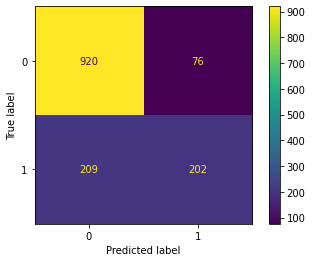

In [ ]:
#observar atraves da métricas
plot_confusion_matrix(rf_tunned.fit(x_train, y_train), x_test, y_test, values_format='d');

In [ ]:
#ver as métricas
#indicio de oferfitting

print(f"Acurácia (Treino): {accuracy_score(y_train, rf_tunned.fit(x_train, y_train).predict(x_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf_tunned.fit(x_train, y_train).predict(x_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf_tunned.fit(x_train, y_train).predict(x_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf_tunned.fit(x_train, y_train).predict(x_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, rf_tunned.fit(x_train, y_train).predict(x_train))}")
print(f"Precision (Teste): {precision_score(y_test, rf_tunned.fit(x_train, y_train).predict(x_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, rf_tunned.fit(x_train, y_train).predict(x_train))}")
print(f"Recall (Teste): {recall_score(y_test, rf_tunned.fit(x_train, y_train).predict(x_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, rf_tunned.fit(x_train, y_train).predict(x_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, rf_tunned.fit(x_train, y_train).predict(x_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, rf_tunned.fit(x_train, y_train).predict_proba(x_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, rf_tunned.fit(x_train, y_train).predict_proba(x_test)[:,1])}")

Acurácia (Treino): 0.8440888888888889
Acurácia (Teste): 0.8002842928216063
Acurácia Balanceada (Treino): 0.7518272612265093
Acurácia Balanceada (Teste): 0.7142511652449213
Precision (Treino): 0.7556357078449053
Precision (Teste): 0.7416974169741697
Recall (Treino): 0.5679012345679012
Recall (Teste): 0.49635036496350365
F1-Score (Treino): 0.6494117647058824
F1-Score (Teste): 0.5985611510791367
ROCAUC (Treino): 0.9136499532712281
ROCAUC (Teste): 0.8540084913864706
